<h3 align='center'><b>TEAM ID - 19-AUG-23-CDS-BUN-021-WEM9-CHE</b><h3>
<h5 align='center'><b><center>PROJECT ID - PTID-CDS-JAN-24-1772</center></b></h5>

<h4><b>Business Case </b><h4>
<p style="font-size: 14px;">Bob has started his own mobile company. He wants to give a tough fight to big companies like
Apple, Samsung etc. He does not know how to estimate the price of mobiles his company creates. In this competitive
mobile phone market, you cannot simply assume things. To solve this problem he collects sales data
of mobile phones of various companies. Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory
etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve
this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the
price is.</p>

<h4><b>Problem Statement</b><h4>
<ul>
    <li><span style="font-size: 14px">Make a data analysis using the provided information.</span></li>
    <li><span style="font-size: 14px">Assume the features offered to determine the Price Range.</span></li>
    <li><span style="font-size: 14px">create a model that can anticipate mobile phone prices with accuracy and assist Bob in growing his business.</span></li>
</ul>

In [121]:
## Basic Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
## Import Dataset

data = pd.read_csv('./data/cellphone.csv')

In [45]:
# Display first 5 rows of data.

pd.set_option('display.max_columns', None)
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [46]:
# Dispaly Last 5 rows of data.

pd.set_option('display.max_columns', None)
data.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3

<h4 style="margin-bottom: 0px"><b>Domain Analysis</b></h4>

<p style="font-size: 14px">The specifications available for different types of phones and mobile devices are listed in the Given Dataset. Given that the price may change depending on the characteristics offered, the dependent variable, "price_range," may also fluctuate.<p>
<style>
    table{
        width: 100%;
        margin: 0;
    }
    th{
        font-size: 14px;
    }
    td{
        font-size: 12px;
    }
    tr > td:first-child{
        font-weight: bold;
    }
</style>
<table>
    <thead>
        <tr>
            <th>Specification</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>battery_power</b></td>
            <td>Total energy a battery can store in one time measured in mAh</td>
        </tr>
        <tr>
            <td><b>blue</b></td>
            <td>Has bluetooth or not</td>
        </tr>
        <tr>
            <td><b>clock_speed</b></td>
            <td>speed at which the micr0processor executes instructions</td>
        </tr>
        <tr>
            <td><b>dual_sim</b></td>
            <td>has dual sim or not</td>
        </tr>
        <tr>
            <td><b>fc</b></td>
            <td>Front Camera mega pixels</td>
        </tr>
        <tr>
            <td><b>four_g</b> </td>
            <td>Has 4G or not</td>
        </tr>
        <tr>
            <td><b>int_memory</b> </td>
            <td>Internal Memory in Gigabytes</td>
        </tr>
        <tr>
            <td><b>m_dep</b> </td>
            <td>Mobile Depth in cm</td>
        </tr>
        <tr>
            <td><b>mobile_wt</b> </td>
            <td>Weight of mobile phone</td>
        </tr>
        <tr>
            <td><b>n_cores</b> </td>
            <td>Number of cores of processor</td>
        </tr>
        <tr>
            <td><b>PC</b> </td>
            <td>Primary Camera mega pixels</td>
        </tr>
        <tr>
            <td><b>px_height</b> </td>
            <td>Pixel Resolution Height</td>
        </tr>
        <tr>
            <td><b>px_width</b> </td>
            <td>Pixel Resolution Width</td>
        </tr>
        <tr>
            <td><b>ram</b> </td>
            <td>Random Access Memory in Megabytes</td>
        </tr>
        <tr>
            <td><b>sc_h</b> </td>
            <td>Screen Height of mobile in cm</td>
        </tr>
        <tr>
            <td><b>sc_w</b> </td>
            <td>Screen Width of mobile in cm</td>
        </tr>
        <tr>
            <td><b>talk_time</b> </td>
            <td>longest time that a single battery charge will last when you are</td>
        </tr>
        <tr>
            <td><b>three_g</b> </td>
            <td>Has 3G or not</td>
        </tr>
        <tr>
            <td><b>touch_screen</b> </td>
            <td>Has touch screen or not</td>
        </tr>
        <tr>
            <td><b>wifi</b> </td>
            <td>Has wifi or not</td>
        </tr>
        <tr>
            <td><b>price_range</b> </td>
            <td>A Target/output variable that is categorized as below
                <ul>
                    <li><b>0 </b>Low Cost</li>
                    <li><b>1 </b>Medium Cost</li>
                    <li><b>2 </b>High Cost</li>
                    <li><b>3 </b>Very High Cost</li>
                </ul>
            </td>
        </tr>
    </tbody>
</table>

<h3><b>Basic Checks</b></h3>

In [47]:
# Total No.of Rows and Columns in dataset

rows, col = data.shape
print ("Dimensions of dataset: {}" . format (data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2000, 21)
Rows: 2000 
Columns: 21


In [48]:
# Columns in dataset

columns = data.columns
for i in range(len(columns)):
    print(f'Column {i}: {columns[i]}')

Column 0: battery_power
Column 1: blue
Column 2: clock_speed
Column 3: dual_sim
Column 4: fc
Column 5: four_g
Column 6: int_memory
Column 7: m_dep
Column 8: mobile_wt
Column 9: n_cores
Column 10: pc
Column 11: px_height
Column 12: px_width
Column 13: ram
Column 14: sc_h
Column 15: sc_w
Column 16: talk_time
Column 17: three_g
Column 18: touch_screen
Column 19: wifi
Column 20: price_range


In [49]:
# Information about Columns in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<h4><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above information we can see there are 
    <ul>
        <li style="font-size: 14px"><b>0 </b>Null values</li>
        <li style="font-size: 14px"><b>18 </b>Integer columns and</li>
        <li style="font-size: 14px"><b>2 </b>Float columns</li>
    </ul>
<p>

In [50]:
# Statistical analysis of the dataset

data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

<h4 style="margin-bottom: 0px"><b>Insights</b></h4>
<p style="font-size: 14px">
    Form the above Statistical analysis we can find there are
    <div style="display: flex; align-items: center;">
        <ul style="font-size: 14px">
            <li><b>1998 Mah</b> is Maximum Battery power</li>
            <li><b>19 MP</b> is Maximum MP of the front camera</li>
            <li><b>64 GB</b> is Maximum Internal Memory</li>
            <li><b>200</b> is Maximum Weight of the Mobile phones</li>
            <li><b>8</b> is Maximum No.of cores in a Mobile phones</li>
            <li><b>1960</b> is Maximum px_height in a Mobile phones</li>
        </ul>
        <ul style="font-size: 14px">
            <li><b>501 Mah</b> is Minimum Battery power</li>
            <li><b>0 MP</b> is Minimum MP of the front camera</li>
            <li><b>2 GB</b> is Minimum Internal Memory</li>
            <li><b>80</b> is Minimum Weight of the Mobile phones</li>
            <li><b>1</b> is Minimum No.of cores in a Mobile phones</li>
            <li><b>0</b> is Minimum px_height in a Mobile phones</li>
        </ul>
    </div>
    And there are <b>2000</b> rows in the dataset
</p>

In [51]:
# Check for missing values in datasets.

data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>

* <span style="font-size: 14px;">The above check implies that there are no missing values</span>

In [52]:
# check for duplicates in datasets.

print(f'The Number of duplicates in the given dataset is {data.duplicated().sum()}')

The Number of duplicates in the given dataset is 0


<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The above check implies that there are no duplicate values</li>
    </ul>
</p>

In [53]:
# no of unique elements in each columns

data.nunique().to_frame().T

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1094     2           26         2  20       2          63     10   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        121        8  21       1137      1109  1562    15    19         19   

   three_g  touch_screen  wifi  price_range  
0        2             2     2            4

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The above check implies unique values in each column in dataset</li>
    </ul>
</p>

In [54]:
# Check for Outliers in the given dataset

numerical_columns = ["battery_power", "clock_speed", "fc", "m_dep", "int_memory", "mobile_wt", "pc", "px_height", "px_width",
                    "ram", "sc_h", "sc_w", "talk_time"]
categorial_columns = ["blue", "dual_sim", "four_g", "n_cores", "three_g", "touch_screen", "wifi"]

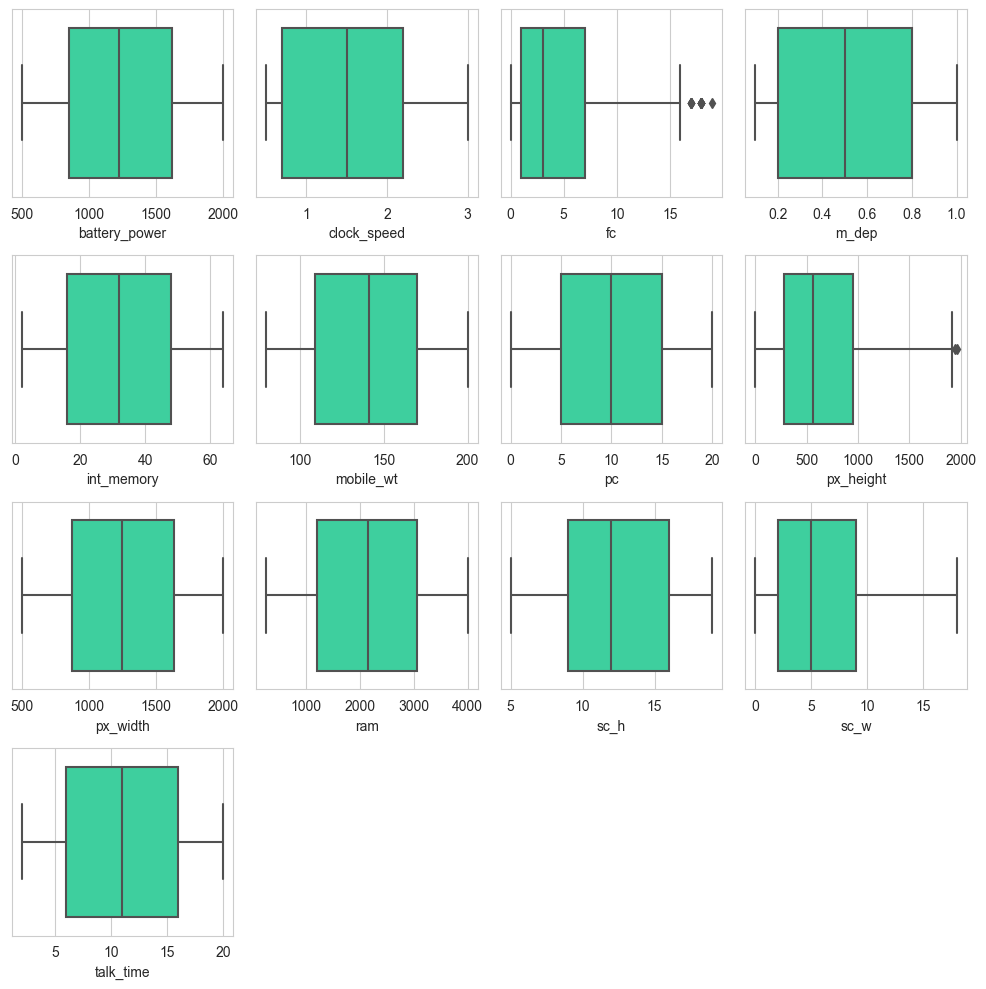

In [55]:
# Box Plot for identifying the outliers in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <= len(numerical_columns):
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x=data[column], color="#26E7A6")
        plt.xlabel(column, fontsize=10)
    plotnumber += 1

plt.tight_layout()

<h4 style="margin-bottom: 0px;"><b>Insights</b></h4>
<p style="font-size: 14px;">
    <ul>
        <li style="font-size: 14px;">The graph implies <b>fc</b> and <b>px_height</b> columns has the outliers.</li>
    </ul>
</p>

<h3><b>Exploratory Data Analysis</b></h3>
<h4><b>Univariate Analysis</b><h4>

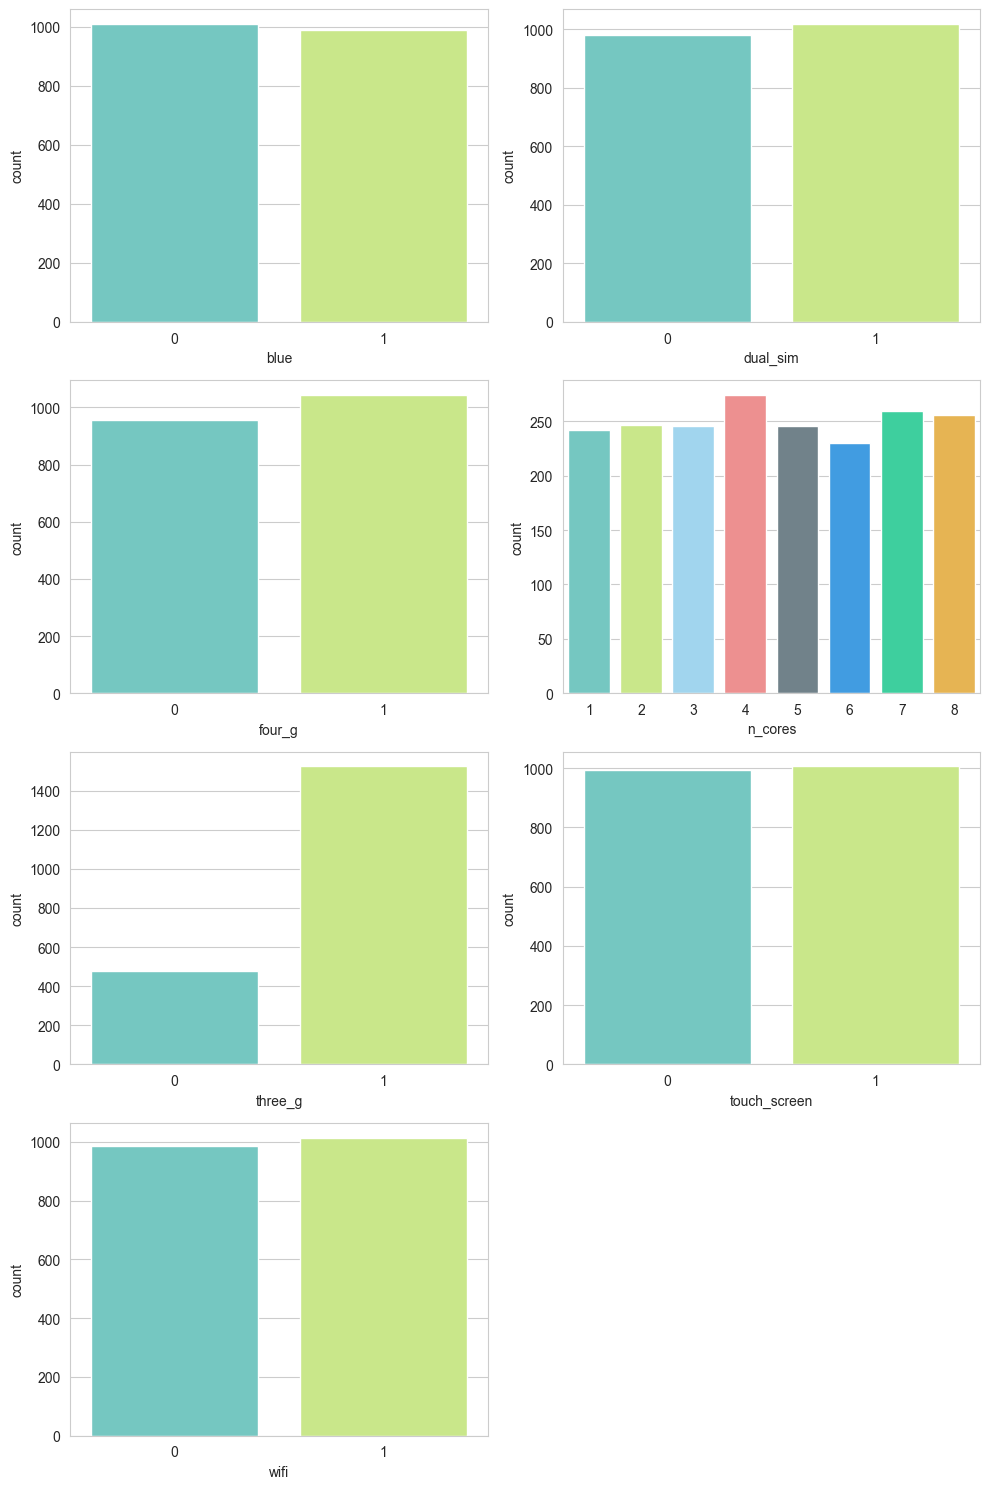

In [56]:
# CountPlot for the categorical variables in the dataset

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1
custom_colors = ["#68D4CD", "#CFF67B", "#94DAFB", "#FD8080", "#6D848E", "#26A0FC", "#26E7A6", "#FEBC3B", "#FAB1B2", "#8B75D7"]

for column in categorial_columns:
    if plotnumber <= len(categorial_columns):
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x=data[column], data=data, palette=custom_colors)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('count')
    plotnumber += 1

plt.tight_layout()

<h4><b>Insights</b></h4>


- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>Blue</b> chart we can see almost greater-than or equal number of devices <b>with</b> and <b>without</b> bluetooth feature. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>Dual Sim</b> chart we can see that the <b>dual simed mobile</b> is <b>more than</b> the <b>singe simed</b> mobile. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>four_g</b> chart we can see that the <b>4G mobile</b> is <b>more than</b> the <b>Non 4G </b> mobile. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>m_dep</b> chart we can see that there are <b>more than 300</b> mobiles with depth of <b>0.1</b>. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>n_cores</b> chart we can see that there are <b>more than 250</b> mobiles with <b>4</b> cores. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>three_g</b> chart we can see there are <b>more than 300</b> mobiles with <b>3G</b> support. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>touch_screen</b> chart we can see that there are <b>almost greater than or equal</b> to the <b>touch</b> and <b>non touch screen</b> mobiles. <br/>
</span>

- <span style="margin-left: 20px; margin-top: 5px; font-size: 14px;">
    From the <b>wifi</b> chart we can see that there are <b>almost greater than or equal</b> number of  <b>wifi support</b> or <b>non wifi supported</b> mobiles. <br/>
</span>


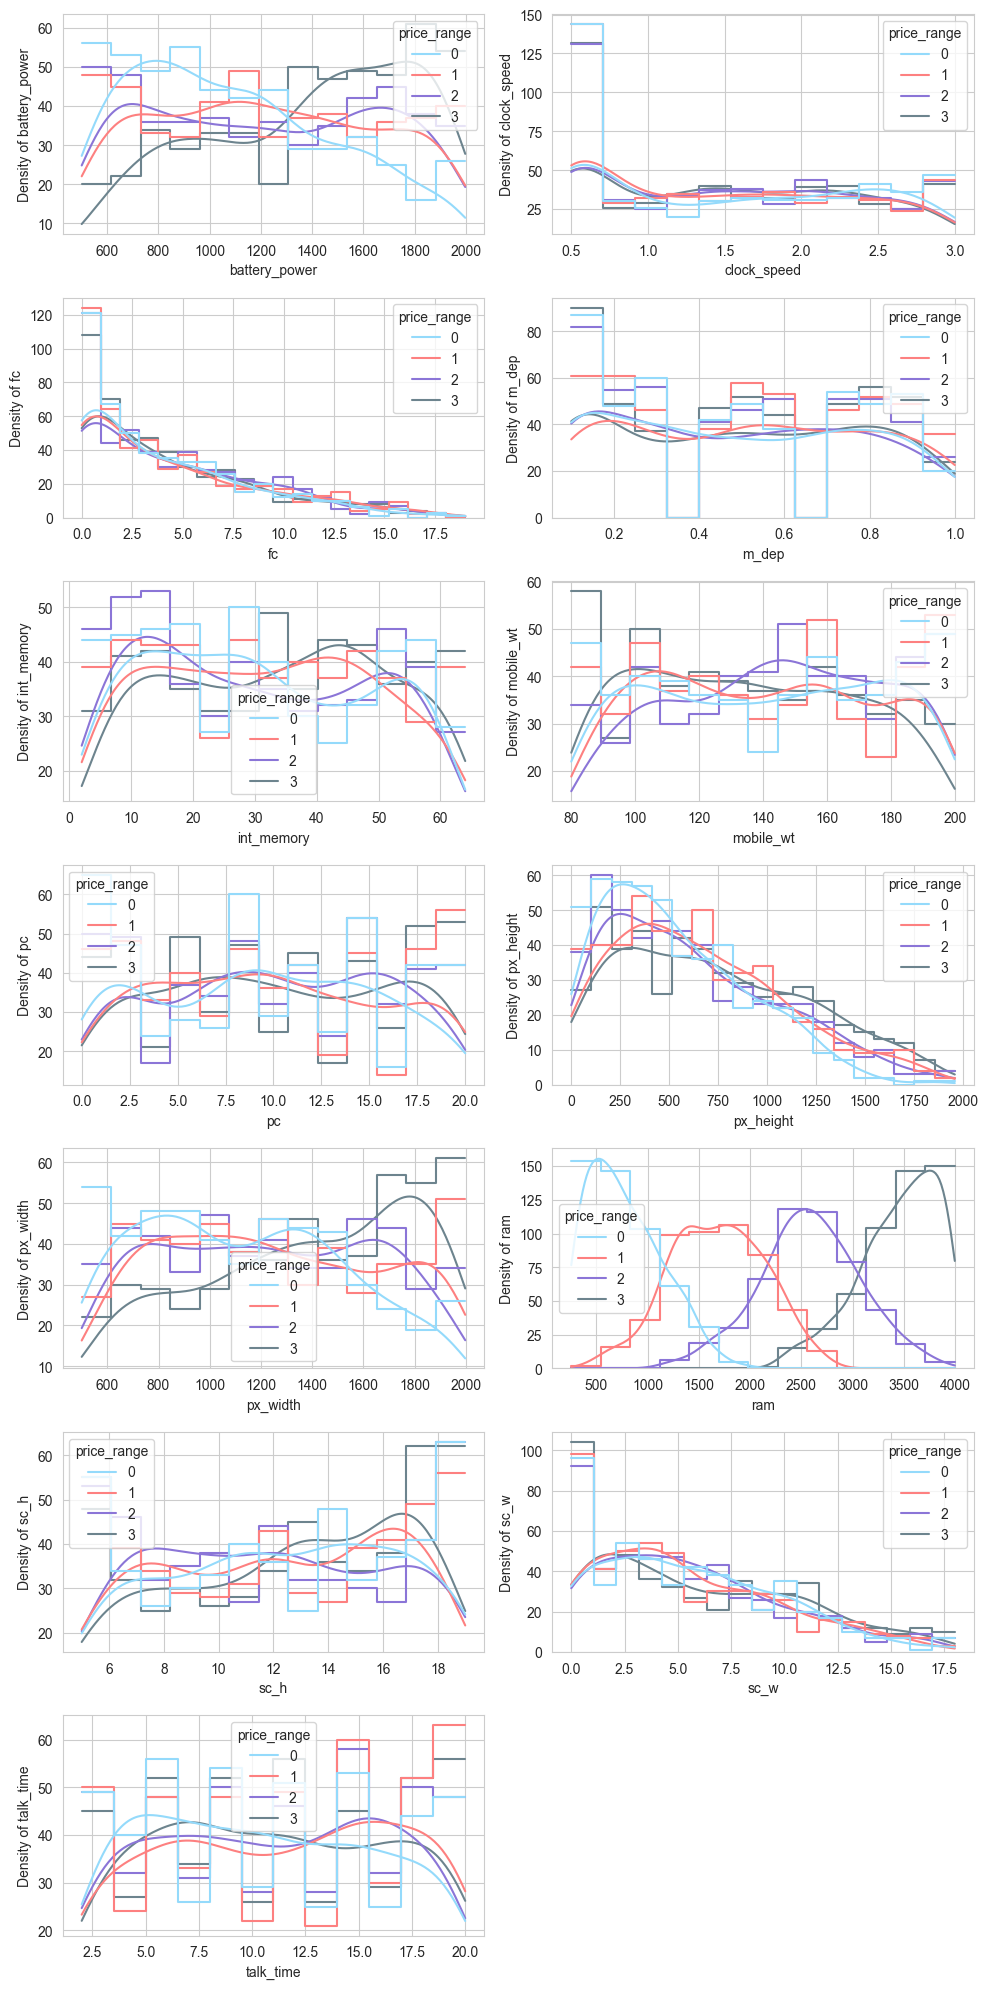

In [57]:
# histplot plot for Numerical Columns

plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.histplot(data=data, x=data[column], hue=data['price_range'], kde=True, palette=custom_colors, fill=False, element='step')
    plt.xlabel(column, fontsize=10)
    plt.ylabel(f'Density of {column}')

plt.tight_layout()
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size: 14px">For the above charts we can conclude that there is <b>(No skewness)</b>a Normal distrubution for <b>int_memory, mobile_wt, pc</b> and <b>talk time</b> for all price ranges</span>

- <b style="font-size: 14px">Battery Power</b>
    - <span style="font-size: 14px">Mobile phones with price ranges of 0-3 mostly have <b>battery_power</b> at the range of <b>600-800, 700-1350, 600-900</b>, and <b>1500-1900 mAh</b>, respectively.</span>

- <b style="font-size: 14px">Clock Speed</b>
    - <span style="font-size: 14px">A <b>positive skewness</b> is observed in the distribution of <b>clock_speed</b> for all price ranges.</span>

- <b style="font-size: 14px">Front Camera</b>
    - <span style="font-size: 14px">Mobile phones with price ranges of 0-3 are <b>positive skewness</b>.</span>

- <b style="font-size: 14px">Pixel Height</b>
    - <span style="font-size: 14px">Mobile phones with price ranges of 0-3 are <b>positive skewness</b>.</span>

- <b style="font-size: 14px">Screen width</b>
    - <span style="font-size: 14px">Mobile phones with price ranges of 0-3 are <b>positive skewness</b>.</span>
    
- <b style="font-size: 14px">Ram</b>
    - <span style="font-size: 14px">The <b>0 Price range</b> of mobile is positively skewed based on the Rams density and There is no evident skewness for <b>1</b> and <b>2 price range</b> of mobiles and whereas for <b>3 price range</b> of mobiles are negatively skewed.</span>

<h4><b>Bivariate Analysis</b><h4>

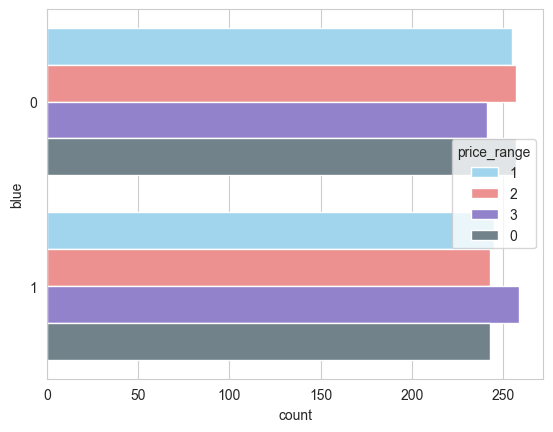

In [58]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['blue'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing might vary depending on whether it has Bluetooth functionality or not.
</span>

- <span style="font-size:14px">
  Bluetooth-enabled cell phones are more common and come in a higher price range. In the medium-to-high price range, there are nearly equal numbers of cell phones featuring Bluetooth features.
</span>

- <span style="font-size:14px">
  The number of non-Bluetooth mobile phones is higher, and their prices fall between the range of cheap and medium cost.  thus there are fewer counts with really high price ranges.
</span>

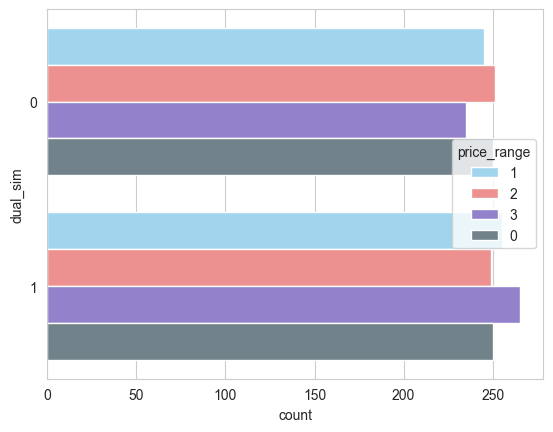

In [59]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['dual_sim'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing might vary depending on whether it has Dual sim featute or not.
</span>

- <span style="font-size:14px">
  Dual sim-enabled cell phones are more common and come in a higher price range. In the medium-to-high price range, there are nearly equal numbers of cell phones featuring Bluetooth features. In the Medium price range, the number of cell phones is more then 250 but less then the number of cell phones with the higher price.
</span>

- <span style="font-size:14px">
  The number of non-Dual sim mobile phones is higher, and their prices fall between the range of low and high cost. thus there are fewer counts with really high price ranges. In the medium price range, the number of non-Dual sim mobile phones are more than the number of mobile phones with the higher price.
</span>

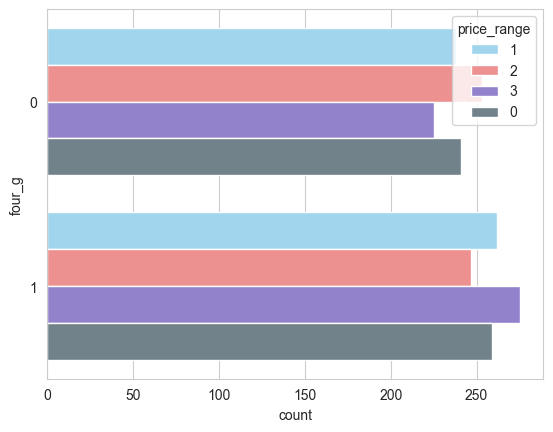

In [60]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['four_g'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing might vary depending on whether it has <b>4G featute or not</b>.
</span>

- <span style="font-size:14px">
  4G-enabled cell phones are <b>more</b> common and come in a <b>very higher</b> price range. In the <b>Low price</b> range, there are <b>more than 250 cell phones</b> featuring 4G feature. In the <b>Low-to-Medium</b> price range, the number of cell phones is <b>almost equal or slightly differ</b> in counts. There are <b>very few phones</b> with 4G featute and falls in the price range of <b>High</b>.
</span>

- <span style="font-size:14px">
  The number of <b>non-4G</b> mobile phones is <b>fewer in counts</b>, and their prices fall in <b>very high</b> cost. In the <b>medium-to-low</b> price range, the number of 4G mobile phones are <b>alomost equal.</b> the number of mobile phones is <b>more</b> with the <b>higher price</b>.
</span>

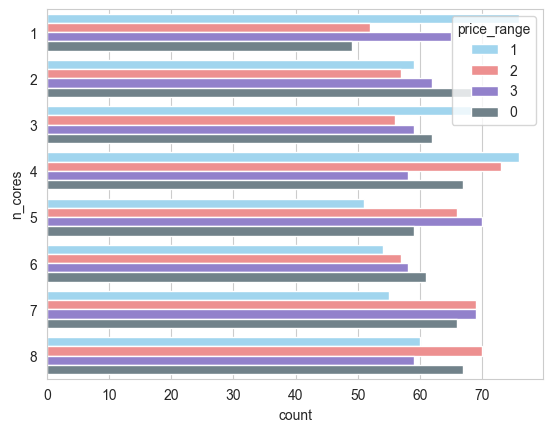

In [61]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['n_cores'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing and count of devices might vary depending on whether it has <b>Number of Cores</b>.
</span>

- <span style="font-size:14px">
  The count of the <b>n-cores</b> chart shows that mobile phones <b>containing 4 cores</b> have the highest frequency.
</span>

- <span style="font-size:14px">
  Moreover, the count of <b>n-cores</b> per price range shows that in the group of mobile phones with <b>4 cores</b>, the <b>High</b>price range of phones have the highest frequency, and in the group of mobile phones <b>containing 4 cores</b>, the <b>Medium</b> price range of phones have the highest frequency.
</span>

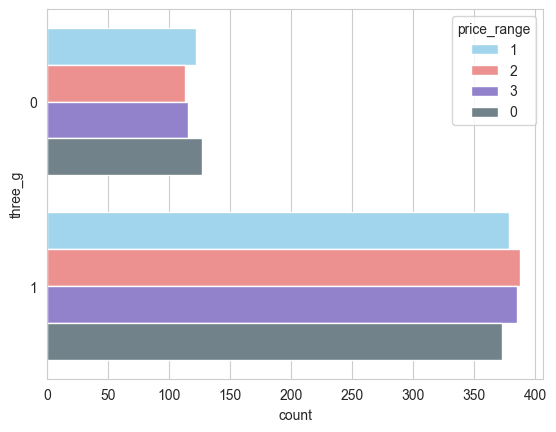

In [62]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['three_g'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing and count of devices might vary depending on whether it has <b>3G featute or not</b>.
</span>

- <span style="font-size:14px">
  3G-enabled cell phones are <b>more</b> common and come in a <b>high</b> price range. In the <b>Low price</b> range, there are <b>more than 350 cell phones</b> featuring 3G feature. In the <b>Low and Medium</b> price range, the number of cell phones is <b>also more than 350</b> in counts. There are <b>very few phones</b> with 3G featute and falls in the price range of <b>Low</b>.
</span>

- <span style="font-size:14px">
  The number of <b>non-3G</b> mobile phones is <b>fewer in counts</b> for all the price ranges of the cell phones.
  The count of ranges between <b>0 to 150</b>. The number of cells phones is more without 3G featute falls in the price range of <b>Low</b>.
</span>

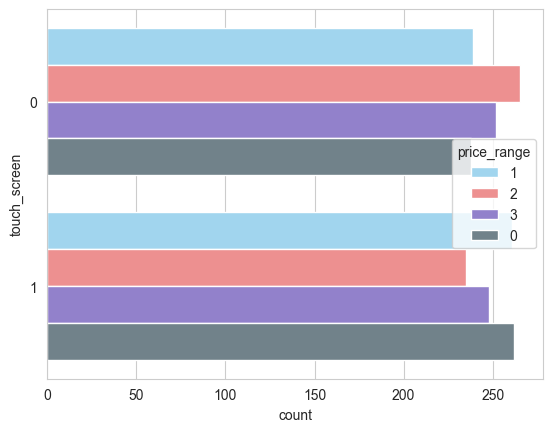

In [63]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['touch_screen'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing and count of devices might vary depending on whether it has <b>Touch Screen featute or not</b>.
</span>

- <span style="font-size:14px">
  The count of the <b>touch_screen</b> chart shows that mobile phones which <b>have Touch Screen</b> have the highest frequency than the ones without Touch Screen.
</span>

- <span style="font-size:14px">
  The count of <b>touch_screen</b> per price range shows that in the group of mobile phones <b>with Touch Screen</b>, the <b>Low</b> price range phones have the highest frequency, and in the group of mobile phones <b>without Touch Screen</b>, the <b>High price range</b> phones have the highest frequency.
</span>

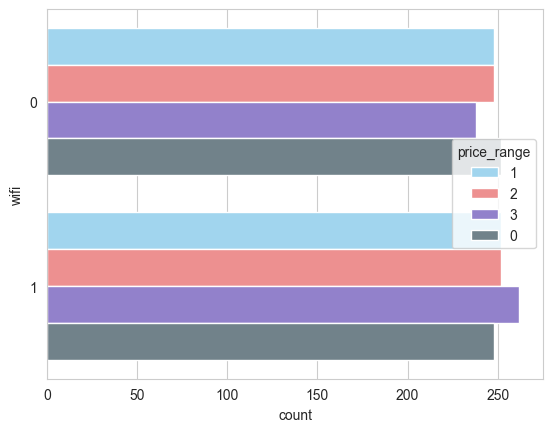

In [64]:
Df = pd.DataFrame(data)
sns.countplot(
    data=Df, 
    y=Df['wifi'], 
    palette=custom_colors, 
    hue=Df['price_range'].astype(str),
)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size:14px; margin-bottom: 0px">
  The above graphic illustrates how a device's pricing and count of devices might vary depending on whether it has <b>Wifi featute or not</b>.
</span>

- <span style="font-size:14px">
  The count of the <b>Wifi</b> chart shows that mobile phones which <b>have Wifi</b> have the highest frequency than the ones without Touch Screen.
</span>

- <span style="font-size:14px">
  The count of <b>wifi</b> per price range shows that in the group of mobile phones <b>with wifi</b>, the <b>Very high</b> price range phones <b>with wifi</b>, the <b>Very high</b> price range of phones have the highest frequency, and in the group of mobile phones <b>without Wifi</b>, the <b>Low </b>price range phones have the highest frequency.
</span>

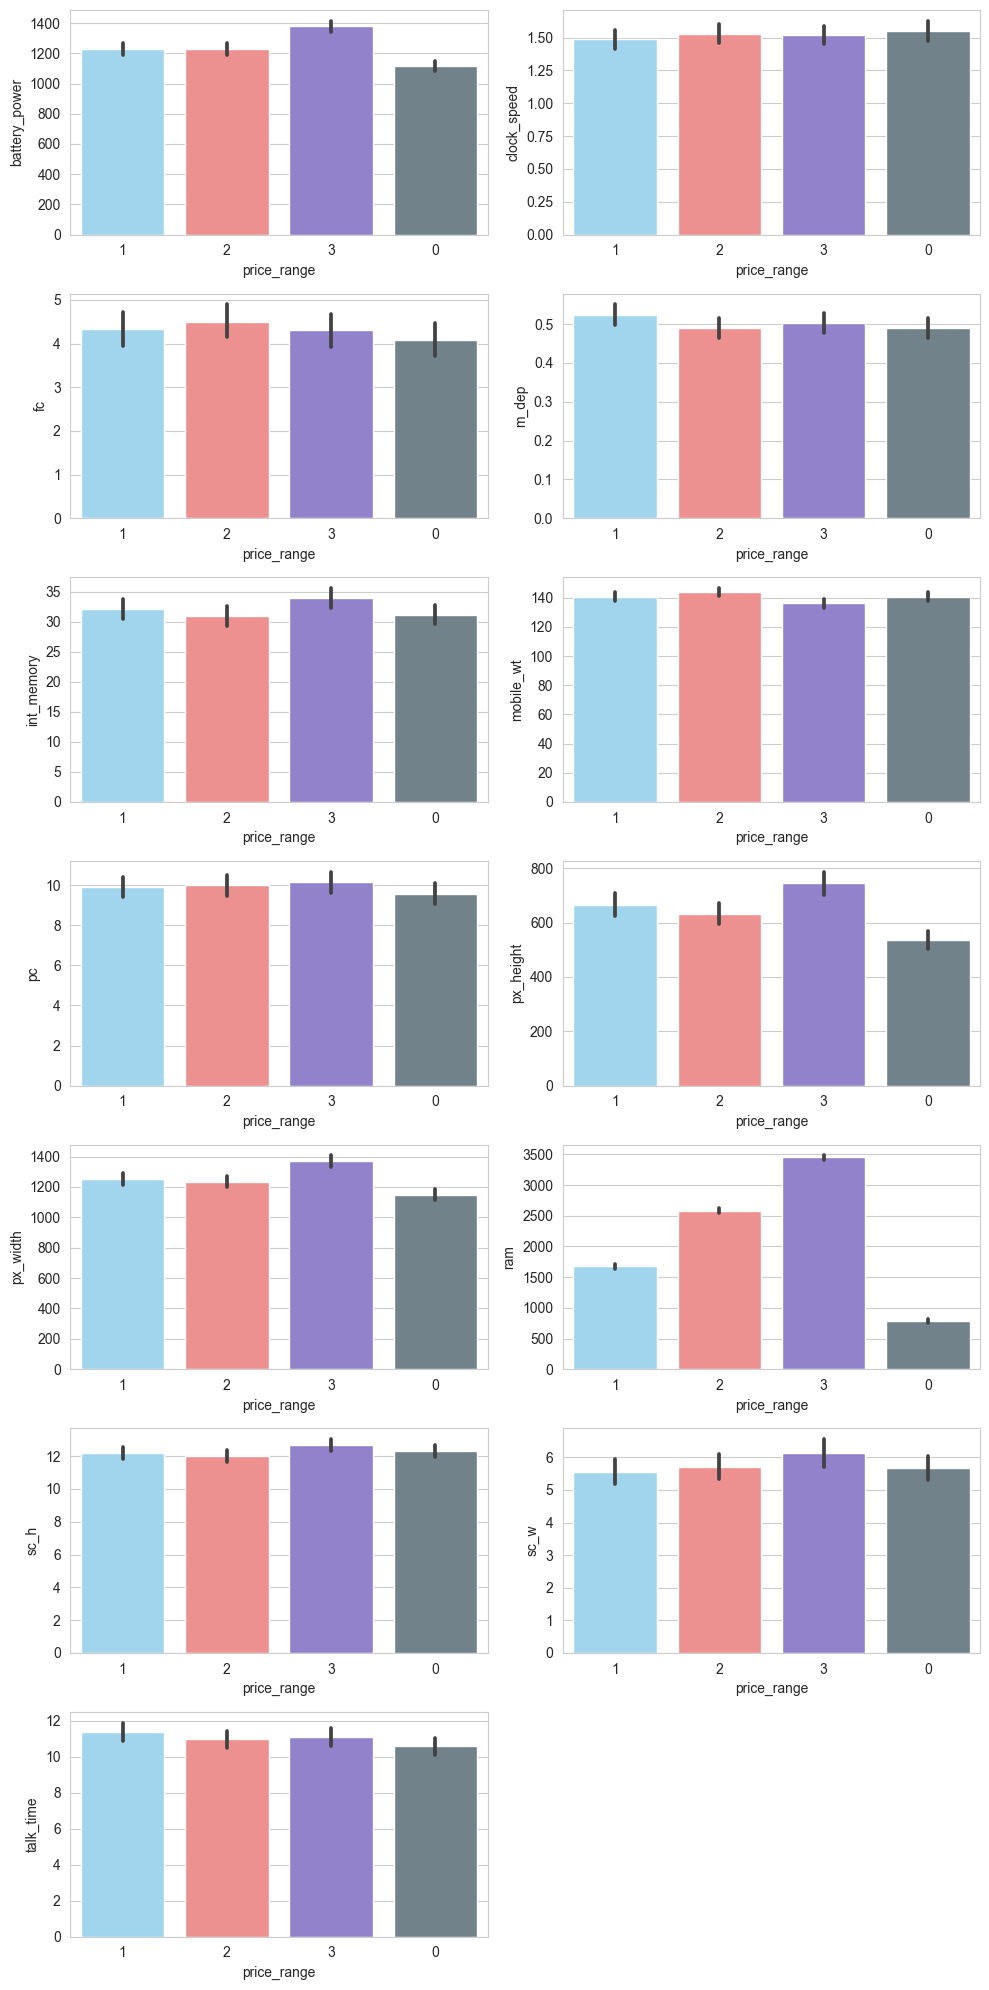

In [65]:
# Relationship between Numerical Columns and Price Range

plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.barplot(x=data['price_range'].astype(str), y=data[column], data=data, palette=custom_colors)
    plt.ylabel(column, fontsize=10)
    plt.xlabel('price_range')

plt.tight_layout()
plt.show()

<h4><b>Insights</b></h4>

- <b style="font-size:14px;">Battery Power</b> and <b style="font-size:14px;">Front Camera</b>
    - <span style="font-size:14px;">Higher price ranges tend to have higher battery powers on average.</span>

- <b style="font-size:14px;">RAM</b>
    - <span style="font-size:14px;"> There is a clear trend where higher price ranges correspond to higher RAM capacities.</span>

- <b style="font-size:14px;">Talk Time, Clock Speed </b> and <b style="font-size:14px;">Screen Width</b>
    - <span style="font-size:14px;"> There is no clear trend or significant is observed between screen width or clock speed or Talk Time against price range.</span>

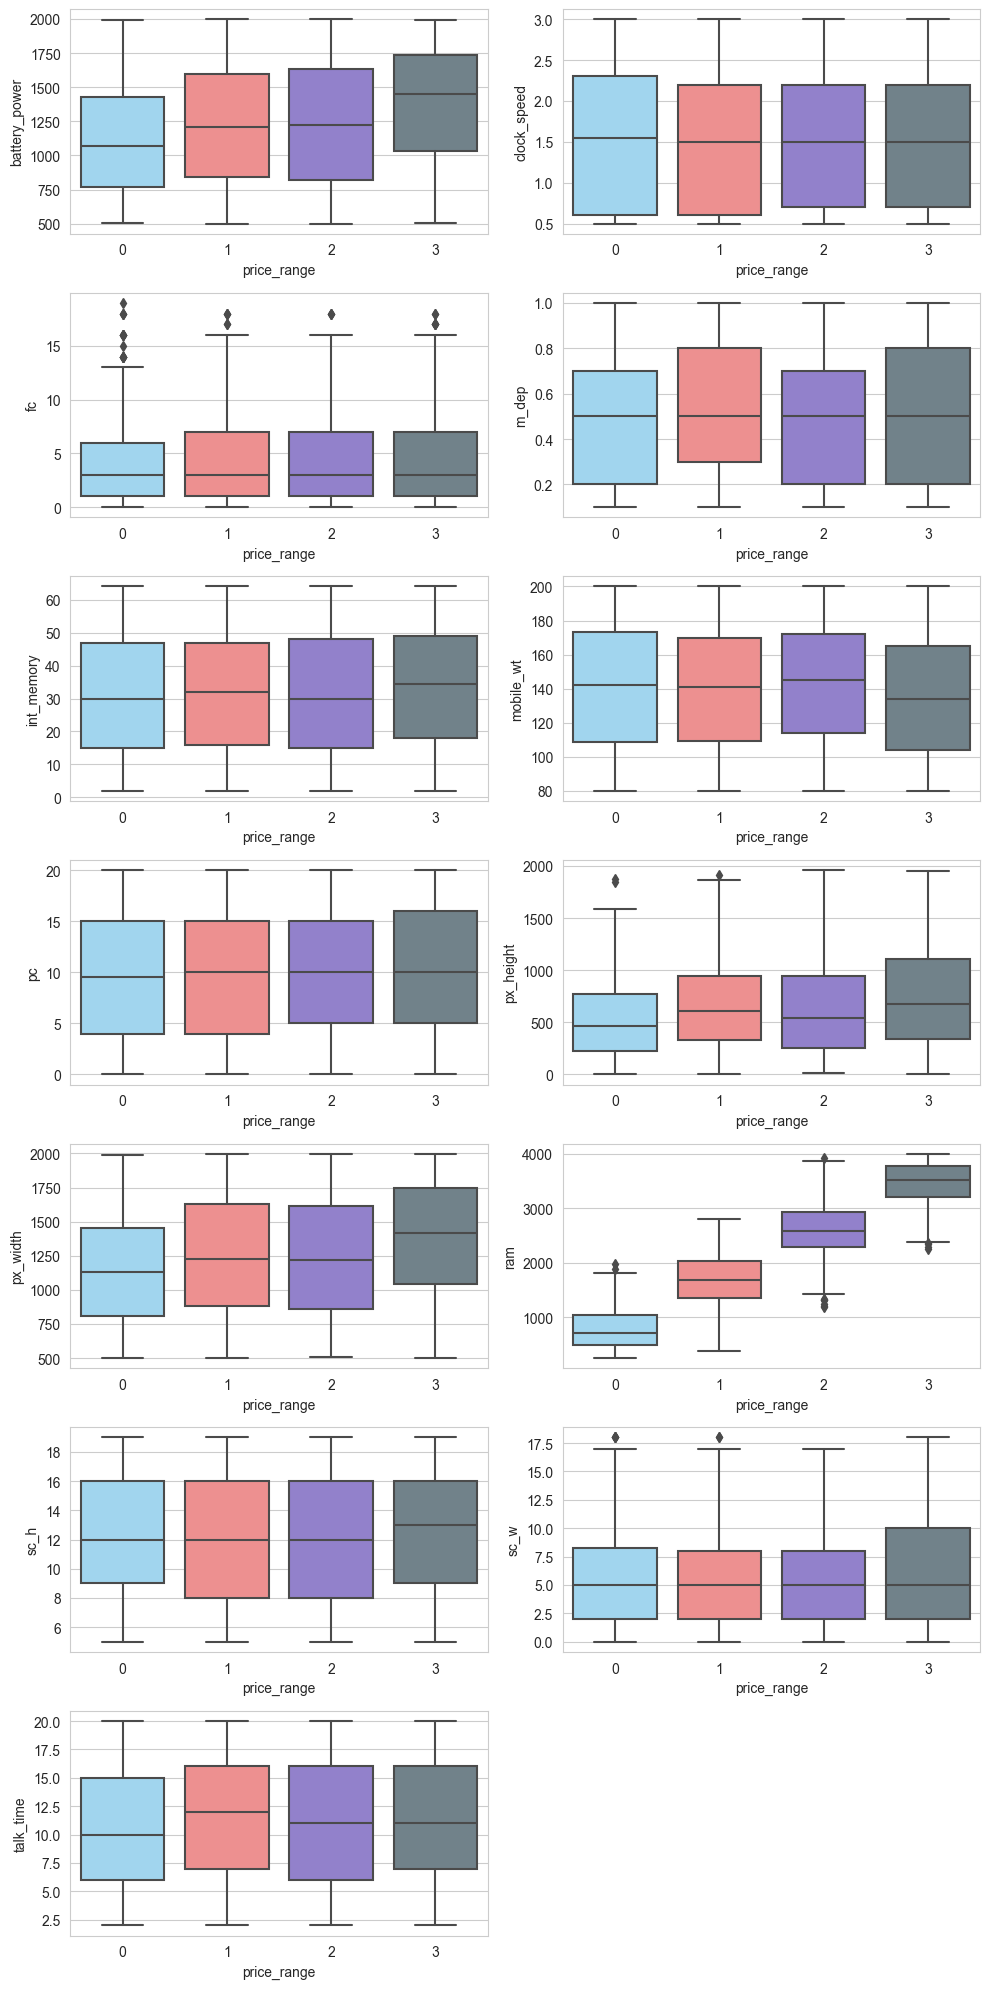

In [66]:
# Box plot for the given dataset

plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.boxplot(x=data['price_range'], y=data[column], data=data, palette=custom_colors)
    plt.ylabel(column, fontsize=10)
    plt.xlabel('price_range')

plt.tight_layout()
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size: 14px">Form the above charts implies that there is <b>No Outliers</b> in <b>Battery Power, Clock Speed, Internal Memory, Screen Height, Pixel width, Mobile weight, Primary camera Megapixel </b>Columns.</span>
- <span style="font-size: 14px">Form the above charts implies that there is <b>Outliers</b> in <b>Fc, sc_w, ram, px_h </b>Columns.</span>

<h4><b>Multivariate Analysis</b></h4>

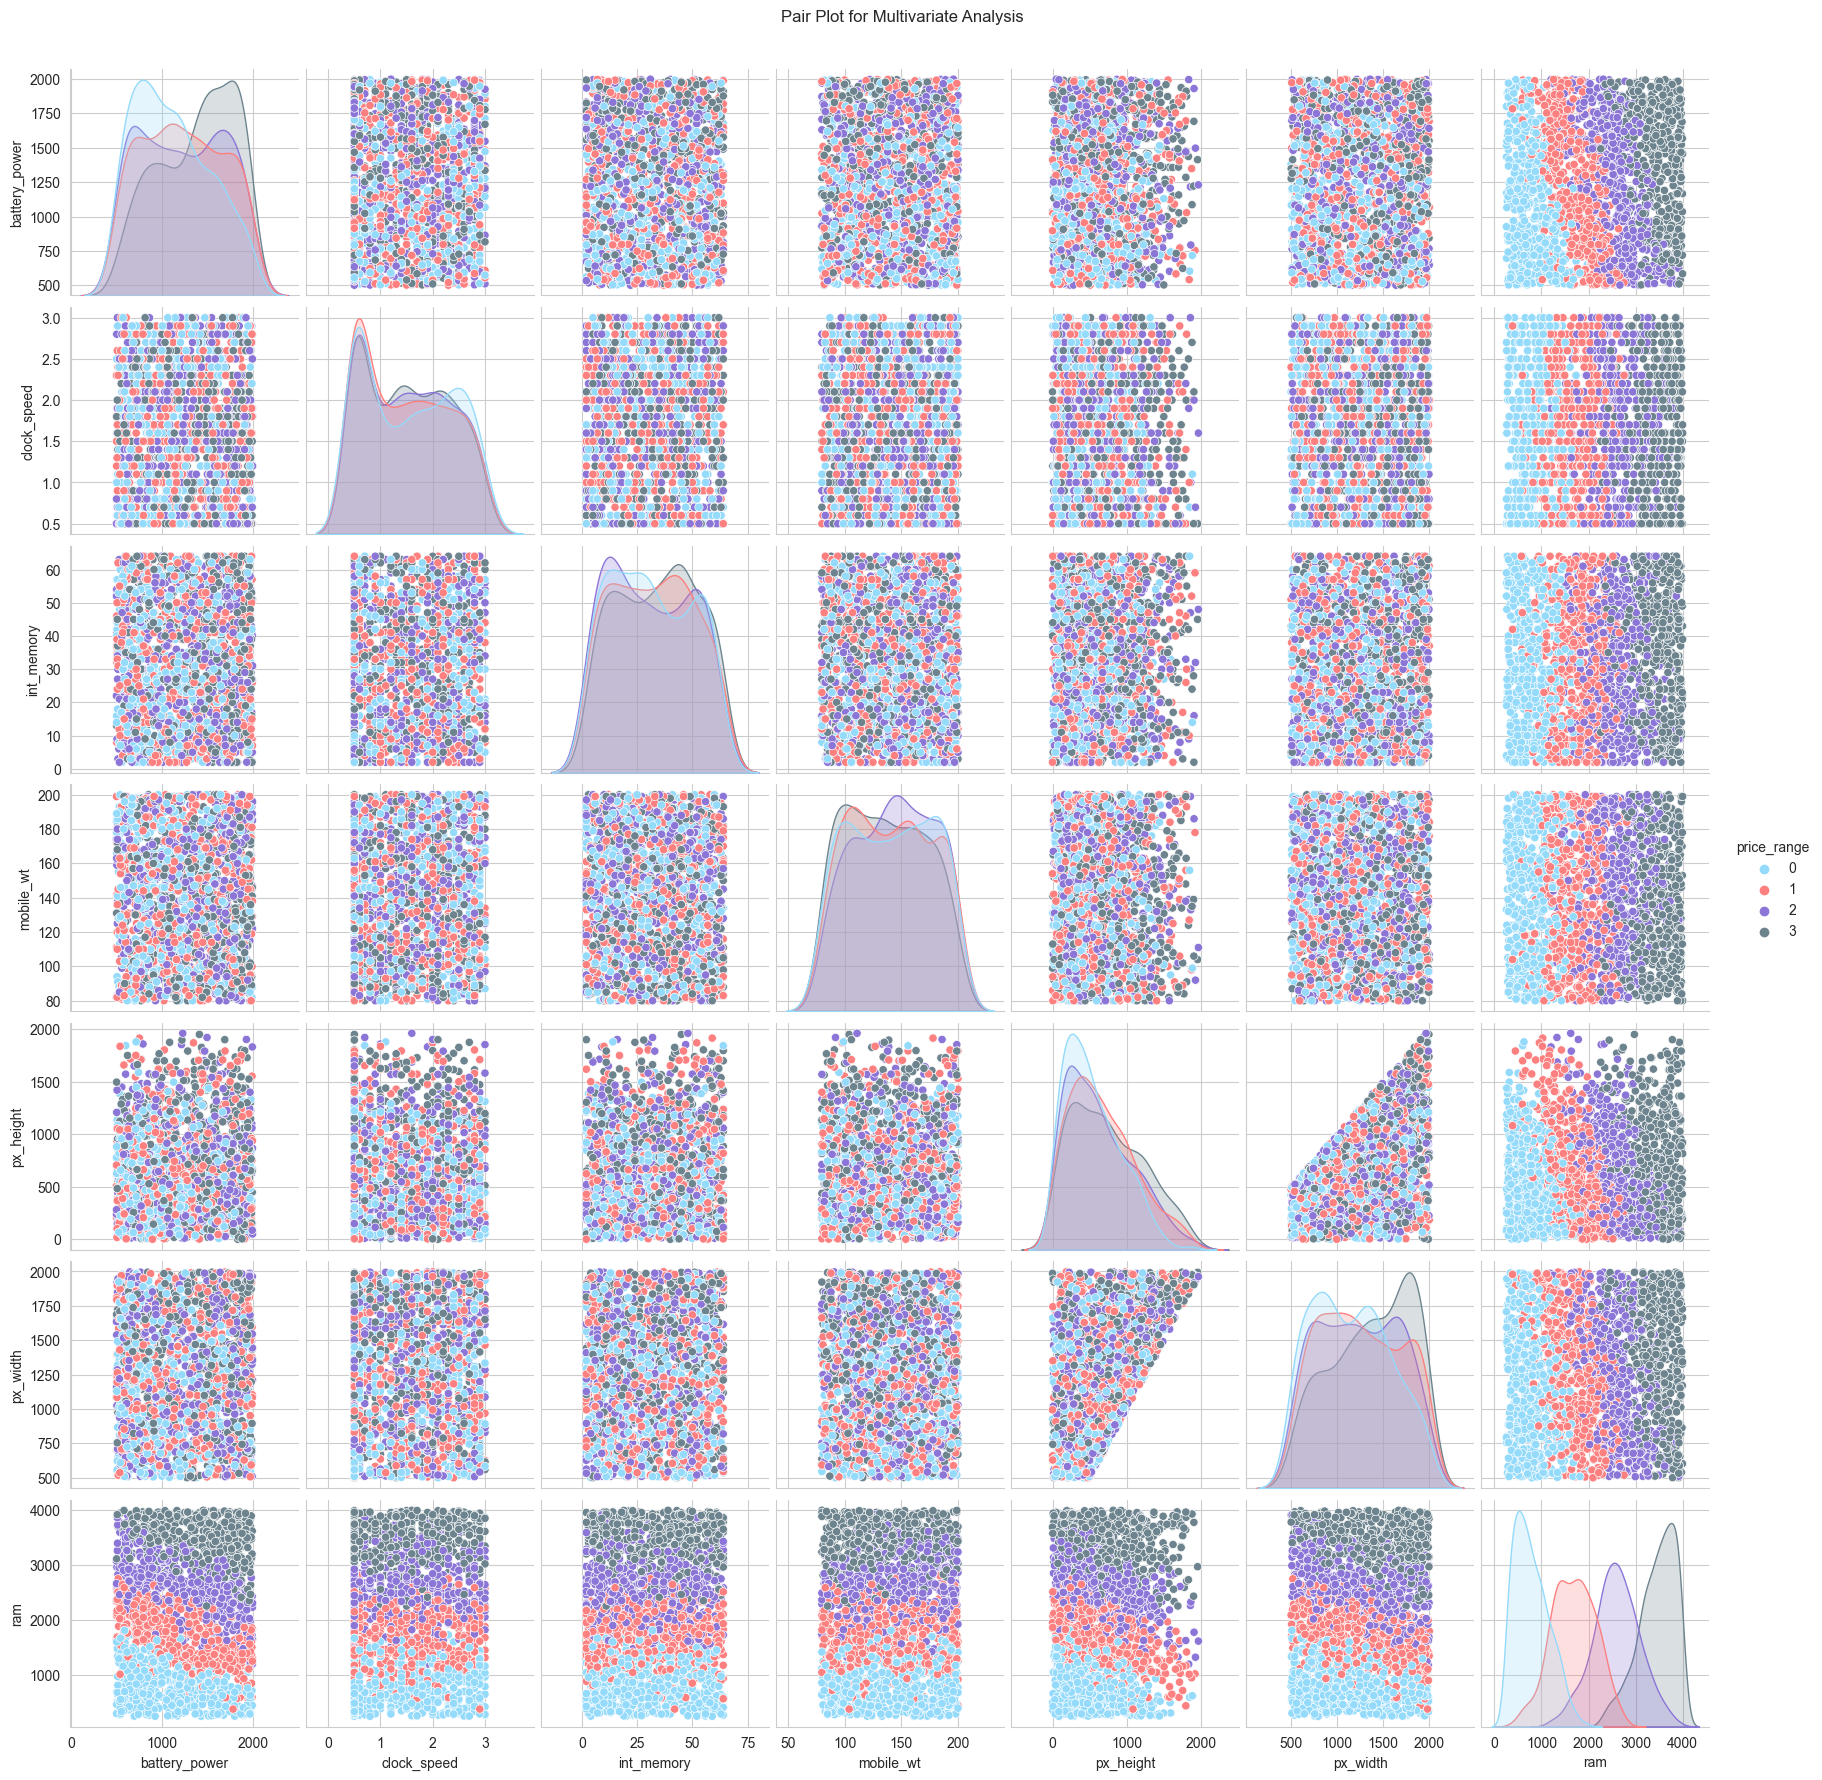

In [67]:
FEATURES = [col for col in data.columns if col != 'price_range']
selected_columns = [col for col in FEATURES if data[col].nunique() >= 25]
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

# Combine selected columns with the target variable 'price_range'
selected_columns.append('price_range')

# Create a DataFrame with the selected columns
selected_data = data[selected_columns]

# Use pairplot
sns.pairplot(selected_data, hue='price_range', palette=custom_colors)
plt.suptitle('Pair Plot for Multivariate Analysis', y=1.02)
plt.show()

<h4><b>Insights</b></h4>

- <span style="font-size: 14px">From the scatter plot, it is clear that pixel height and the <b>pixel width</b> have the <b>strong positive relationship</b> between each other.</span>

- <span style="font-size: 14px">An extreme data point can be found in the distribution of clockspeed feature, which could be dealt with data cleaning.</span>

- <span style="font-size: 14px">With respect to the distribution of other features, the trend is not very clear except pixel height which is skewed towards the left.</span>

<h3><b>Data Preprocessing</b></h3>

<h4 style="font-size: 16px;"><b>Check for if there is any NULL Values</b></h4>

In [68]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- <span style="font-size: 14px">Clearly implies that there is <b>NO Null values</b> in the given dataset.</span>

<h4 style="font-size: 16px;"><b>Check for dupicates in the datasets.</b></h4>

In [69]:
data.duplicated().sum()

0

- <span style="font-size: 14px">Clearly implies that there is <b>NO Duplicated values</b> in the given dataset.</span>

- <span style="font-size: 14px">In the given dataset there are some of the datas are incorrect. for sampel the columns like m_dep, pc etc... </span>

<h4 style="font-size: 16px;"><b>Handling Corrupted Data</b></h4>

In [70]:
data.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

- <span style="font-size: 14px">As mentioned before the m_dep column has a minimum value of 0 as centimeter for cell phone, which is quite impossible.</sapn>

- <span style="font-size: 14px">Based on the diffrent company, models of cell phone the depth may vary based on thier design. Most of the models falls into <b>7mm </b> to <b>10mm</b>, some high-end models fall into <b>6mm or even less till 4mm</b>.</sapn>

- <span style="font-size: 14px"><a href="https://www.techrankup.com/en/smartphones-thickness-ranking/">Refrence</a> (click here)</span>

- <span style="font-size: 14px">Based on the above reference I am considering <b>5mm</b> or <b>0.5 cm</b> thickness as minimum for cell phone. </span>


In [71]:
# Imputing the m_dep column values

median_value = data['m_dep'].median()

# selecting and replacing the values from the column to impute the data
data.loc[data['m_dep']<0.5, 'm_dep'] = median_value

# check the describe after imputing the data using the median for the selected values
data.m_dep.describe()

count    2000.000000
mean        0.626000
std         0.165159
min         0.500000
25%         0.500000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [72]:
data.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

- <span style="font-size: 14px">As mentioned before the px_height column has a minimum value of 0 as pixels for cell phone, which is quite impossible.</sapn>

- <span style="font-size: 14px">Based on the diffrent company, models of cell phone the pixel height may vary based on thier design. The recent smart cell phones has more than 720.</sapn>

- <span style="font-size: 14px"><a href="https://www.gsmarena.com/nokia_1100-512.php">Refrence</a> (click here)</span>

- <span style="font-size: 14px">Based on the above reference I am considering <b>65</b> as a minimum pixel height for cell phone. </span>

In [73]:
# Imputing the px_height column values

median_value = data['px_height'].median()

# selecting and replacing the values from the column to impute the data
data.loc[data['px_height'] < 65, 'px_height'] = median_value

# check the describe after imputing the data using the median for the selected values
data.px_height.describe()

count    2000.000000
mean      668.984000
std       424.033552
min        65.000000
25%       330.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [74]:
data.sc_w.describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

- <span style="font-size: 14px">As mentioned before the sc_w (screen width) column has a minimum value of 0cm for cell phone, which is quite impossible.</sapn>

- <span style="font-size: 14px">Based on the diffrent company, models of cell phone the screen width may vary based on thier design. The recent smart cell phones has more than 1000cm.</sapn>

- <span style="font-size: 14px"><a href="https://www.gsmarena.com/nokia_1100-512.php">Refrence</a> (click here)</span>

- <span style="font-size: 14px">Based on the above reference I am considering <b>2.54 cm</b> as a minimum screen width for cell phone. </span>

In [75]:
# Imputing the px_height column values

median_value = data['sc_w'].median()

# selecting and replacing the values from the column to impute the data
data.loc[data['sc_w'] < 2.54, 'sc_w'] = median_value

# check the describe after imputing the data using the median for the selected values
data.sc_w.describe()

count    2000.000000
mean        6.871000
std         3.380839
min         3.000000
25%         5.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

<h4 style="font-size: 16px"><b>Check for outliers</b></h4>

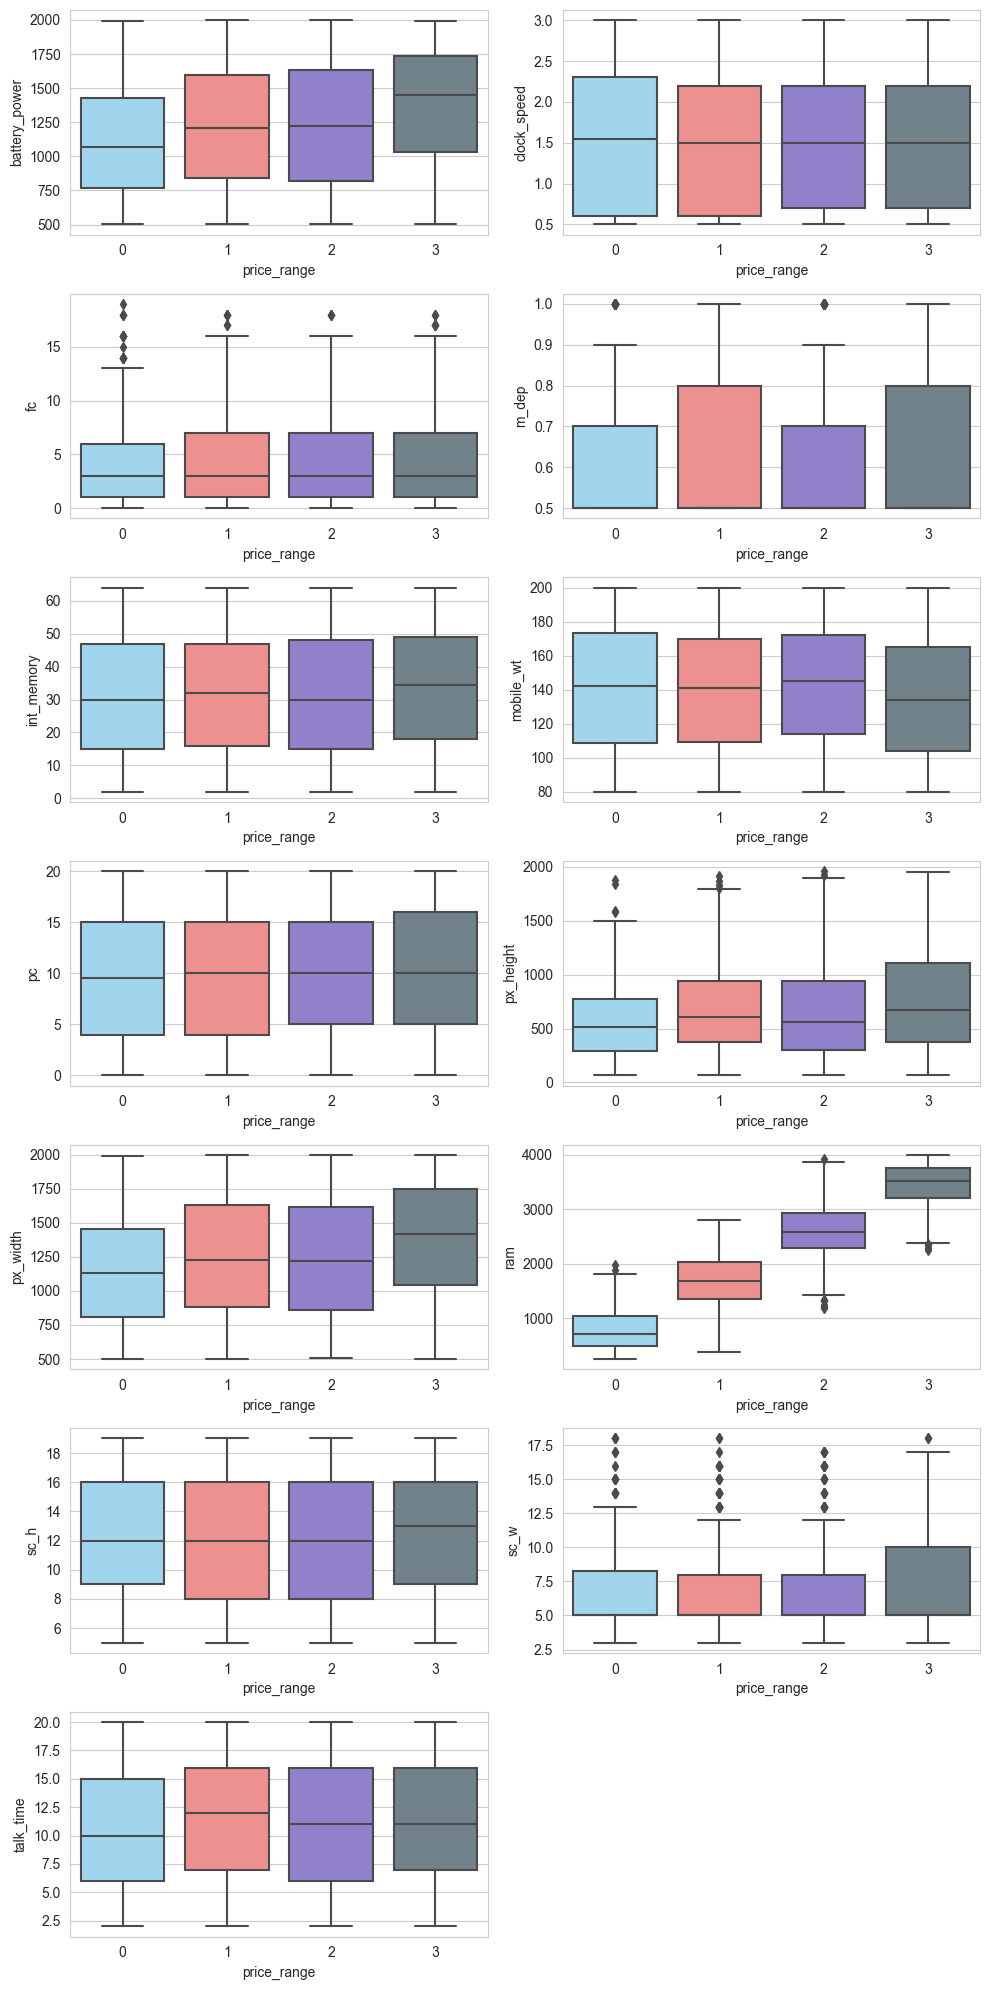

In [77]:
# Box plot for the given dataset

plt.figure(figsize=(10,20),facecolor='white')
sns.set_style('whitegrid')
custom_colors = ["#94DAFB", "#FD8080", "#8B75D7", '#6D848E']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(int((len(numerical_columns) - 1) / 2) + 1, 2, i)
    sns.boxplot(x=data['price_range'], y=data[column], data=data, palette=custom_colors)
    plt.ylabel(column, fontsize=10)
    plt.xlabel('price_range')

plt.tight_layout()
plt.show()

- <span style="font-size: 14px">Form the above charts implies that there is <b>Outliers</b> in <b>Fc, sc_w, ram, px_h </b>Columns.</span>
- <span style="font-size: 14px">We need to handle the outliers using <b>IQR methodology</b>.</span>

In [83]:
num_cols = data[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

number_of_outliers = outliers.sum()

number_of_outliers.to_frame().T

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  pc  \
0              0            0  18           0      0          0   0   

   px_height  px_width  ram  sc_h  sc_w  talk_time  
0          9         0    0     0    56          0

<h4 style="font-size: 16px"><b>Cleaning the outliers</b></h4>

In [102]:
# Hadling the outliers for px_height column

q1 = data['px_height'].quantile(0.25)
q3 = data['px_height'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  1848.875 and lower bound  -580.125


In [103]:
data.loc[data['px_height'] < lower_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [104]:
data.loc[data['px_height'] > upper_bound]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
148           1216     0          3.0         0   4       0          47   
274            793     0          1.0         1   5       1          30   
305           1348     0          2.0         0  18       0          52   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
148    0.5        199        3   7       1852      1967  2268    13     5   
274    0.9        133        2  15       1858      1935  2332    17    13   
305    0.5         98        3  20       1869      1942   955    18    11   

     talk_time  three_g  touch_screen  wifi  price_range  
148          4        0             1     1            2  
274         14        1             1     1            2  
305          7        1             1     1            1

In [105]:
# updating the columns outliets data with median values

data.loc[data['px_height'] > upper_bound, 'px_height'] = np.median(data['px_height'])

In [106]:
# check if the data is updated or not

data.loc[data['px_height'] > upper_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

- <span style="font-size: 14px; font-weight: bold;">Outliers are handled for the <b>px_height</b> columns.</span>

In [107]:
# Hadling the outliers for fc column

q1 = data['fc'].quantile(0.25)
q3 = data['fc'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  16.0 and lower bound  -8.0


In [108]:
data.loc[data['fc'] < lower_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [109]:
data.loc[data['fc'] > upper_bound]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
95             1137     1          1.0         0  18       0           7   
169            1569     0          2.8         1  17       0          44   
226            1708     1          2.4         1  18       1          49   
229            1689     0          1.8         0  17       0          24   
300            1937     1          1.7         0  17       0          58   
305            1348     0          2.0         0  18       0          52   
372            1703     1          1.5         1  17       1          55   
584             946     1          2.6         1  17       0           5   
1387           1533     1          1.1         1  18       1          17   
1406           1731     1          2.3         1  18       0          60   
1416           1448     0          0.5         1  18       0           2   
1549           1772     1          1.6         0  17       1          45   
1554           1957     0          1.2         1  18       1          36   
1693            695     0          0.5         0  18       1          12   
1705           1290     1          1.4         1  19       1          35   
1880           1720     0          1.6         0  18       1           2   
1882            591     0          2.1         1  18       1          16   
1888           1544     0          2.4         0  18       1          12   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
95      1.0        196        3  19        942      1179  3616    13     5   
169     0.5        110        4  20        564      1942  1260     9     5   
226     0.5        109        1  19        233       517  3388     6     4   
229     0.5        127        3  18        954      1200  2766     7     5   
300     0.6        189        1  19       1728      1767  3321     5     4   
305     0.5         98        3  20        564      1942   955    18    11   
372     0.7        138        5  19       1411      1711  2993     5     5   
584     0.5        166        3  20       1698      1771  3720    15     7   
1387    0.5        160        4  20       1054      1393  2520     8     5   
1406    0.5        171        4  20        142      1039  1220     9     3   
1416    0.5        100        5  19        846      1144   593     9     4   
1549    0.5        159        2  18        837      1405  1146     6     5   
1554    0.8        151        2  19       1194      1727  1115    16     5   
1693    0.6        196        2  19       1649      1829  2855    16    13   
1705    0.5        110        4  20        405       742   879    16     5   
1880    0.8        188        5  20        334       896  2522    10     5   
1882    0.5        196        7  20        952      1726   704    14     5   
1888    0.5        186        7  20        470       844   489     9     4   

      talk_time  three_g  touch_screen  wifi  price_range  
95           12        1             1     1            3  
169          17        1             0     0            1  
226          16        1             1     1            3  
229           7        0             1     1            3  
300          14        1             1     0            3  
305           7        1             1     1            1  
372          20        1             1     1            3  
584           4        0             1     0            3  
1387         11        1             0     1            2  
1406         20        0             1     0            1  
1416         18        1             1     1            0  
1549         17        1             1     0            1  
1554         18        1             0     1            1  
1693          7        1             1     1            2  
1705          8        1             0     0            0  
1880          2        1             0     1            2  
1882          4        1             1     1            0 

In [110]:
data.loc[data['fc'] > upper_bound, 'fc'] = np.median(data['fc'])

In [111]:
data.loc[data['fc'] > upper_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

- <span style="font-size: 14px; font-weight: bold;">Outliers are handled for the <b>fc</b> columns.</span>

In [112]:
# Hadling the outliers for sc_w column

q1 = data['sc_w'].quantile(0.25)
q3 = data['sc_w'].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print('Upper bound', '\033[1m', upper_bound, 'and lower bound', '\033[1m',lower_bound)

Upper bound  15.0 and lower bound  -1.0


In [113]:
data.loc[data['fc'] < lower_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

In [114]:
data.loc[data['fc'] > upper_bound]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
31             1568     1          0.5         0  16       0          33   
35              725     0          1.3         1  16       0          60   
38              790     0          2.0         1  16       1          11   
157            1224     0          0.5         0  16       1           6   
206            1642     0          0.5         1  16       1           8   
288            1191     0          1.3         1  16       1          26   
302             768     1          0.9         0  16       1          56   
351            1557     0          2.8         1  16       0           2   
401            1042     0          2.7         1  16       1          50   
501            1773     1          2.5         0  16       1          32   
545             767     0          1.9         0  16       1          19   
564             574     0          2.8         1  16       0          38   
745             894     0          2.1         1  16       0          16   
771             550     1          0.5         0  16       1          23   
1007           1963     1          1.0         0  16       1          34   
1062            587     1          2.5         0  16       1          51   
1196           1735     0          1.8         1  16       0          34   
1447           1002     0          2.7         1  16       1          11   
1456           1404     0          2.1         0  16       0          44   
1594            586     1          0.6         0  16       1          42   
1640           1269     1          2.8         1  16       0          41   
1665           1003     1          2.9         0  16       1          16   
1707           1699     1          0.5         0  16       0          21   
1788           1424     0          0.5         1  16       1          23   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
31      1.0        150        8  20        413       654   508     5     5   
35      0.5        160        8  17       1134      1249  1326    10     4   
38      0.5         87        6  17        347       730  3169     6     5   
157     0.5        109        6  18        747       826   506    10     5   
206     0.5        171        6  17        129       873  2984    13     4   
288     0.8         84        1  20        681       683  1604    14     3   
302     0.5        113        1  20        418       515   952    19     3   
351     0.5        123        5  20       1107      1442  2690    18    16   
401     0.8         93        7  18        727      1705  3215    18     5   
501     0.6        170        6  18       1215      1472  3566    17     6   
545     0.5        185        6  17        271      1000  2445     6     5   
564     0.5         90        6  17        286      1171  3269     8     7   
745     0.7        168        8  20        286      1300  3377     5     5   
771     0.5        145        2  17        486      1930   302    18     5   
1007    0.5        157        2  17       1136      1813   714    18     5   
1062    0.6        111        1  17        244      1361  2746    10     4   
1196    0.5        140        2  17        149       876  2392    17    15   
1447    0.5        185        6  18        285       512   961    10     7   
1456    0.9        151        1  20       1703      1880  1196    10     6   
1594    0.5        121        7  17        785      1118  1869    12     5   
1640    1.0        180        8  17        406      1036  2341    10     9   
1665    0.6        119        8  19        190      1905  1798    16     7   
1707    0.5        156        4  20        105      1099  1181    16     5   
1788    0.6         80        4  18       1399      1663  1053    14    11   

      talk_time  three_g  touch_screen  wifi  price_range  
31            6        1             1     1            0  
35           15        1          

In [115]:
data.loc[data['sc_w'] > upper_bound, 'sc_w'] = np.median(data['sc_w'])

In [116]:
# check if the data is updated or not

data.loc[data['sc_w'] > upper_bound]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

- <span style="font-size: 14px; font-weight: bold;">Outliers are handled for the <b>sc_w</b> columns.</span>

<h4 style="font-size: 16px;"><b>Scaling</b></h4>

In [118]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.177000   
std       439.418206     0.5001     0.816004     0.500035     4.150094   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    16.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.626000   140.249000     4.520500   
std       0.499662    18.145715     0.165159    35.399655     2.287837   
min       0.000000     2.000000     0.500000    80.000000     1.000000   
25%       0.000000    16.000000     0.500000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   660.983500  1251.515500  2124.213000    12.306500   
std       6.064315   413.208659   432.199447  1084.732044     4.213245   
min       0.000000    65.000000   500.000000   256.000000     5.000000   
25%       5.000000   330.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   936.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1842.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      6.545500    11.011000     0.761500      0.503000     0.507000   
std       2.956738     5.463955     0.426273      0.500116     0.500076   
min       3.000000     2.000000     0.000000      0.000000     0.000000   
25%       5.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       8.000000    16.000000     1.000000      1.000000     1.000000   
max      15.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [138]:
columns_to_drop = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
numerical_columns_data = data.drop(columns_to_drop, axis=1)
numerical_columns_data

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  pc  \
0               842          2.2   1           7    0.6        188   2   
1              1021          0.5   0          53    0.7        136   6   
2               563          0.5   2          41    0.9        145   6   
3               615          2.5   0          10    0.8        131   9   
4              1821          1.2  13          44    0.6        141  14   
...             ...          ...  ..         ...    ...        ...  ..   
1995            794          0.5   0           2    0.8        106  14   
1996           1965          2.6   0          39    0.5        187   3   
1997           1911          0.9   1          36    0.7        108   3   
1998           1512          0.9   4          46    0.5        145   5   
1999            510          2.0   5          45    0.9        168  16   

      px_height  px_width   ram  sc_h  sc_w  talk_time  
0           564       756  2549     9     7         19  
1           905      1988  2631    17     3          7  
2          1263      1716  2603    11     5          9  
3          1216      1786  2769    16     8         11  
4          1208      1212  1411     8     5         15  
...         ...       ...   ...   ...   ...        ...  
1995       1222      1890   668    13     4         19  
1996        915      1965  2032    11    10         16  
1997        868      1632  3057     9     5          5  
1998        336       670   869    18    10         19  
1999        483       754  3919    19     4          2  

[2000 rows x 13 columns]

In [139]:
from sklearn.discriminant_analysis import StandardScaler

sclar = StandardScaler()
scaled_data = sclar.fit_transform(numerical_columns_data)

In [141]:
data[['battery_power','clock_speed', 'fc', 'm_dep', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']] = pd.DataFrame(scaled_data)

In [143]:
# check the data is scaled correctly or not
data

battery_power  blue  clock_speed  dual_sim        fc  four_g  \
0         -0.902597     0     0.830779         0 -0.765716       0   
1         -0.495139     1    -1.253064         1 -1.006735       1   
2         -1.537686     1    -1.253064         1 -0.524698       1   
3         -1.419319     1     1.198517         0 -1.006735       0   
4          1.325906     1    -0.395011         0  2.126507       1   
...             ...   ...          ...       ...       ...     ...   
1995      -1.011860     1    -1.253064         1 -1.006735       1   
1996       1.653694     1     1.321096         1 -1.006735       0   
1997       1.530773     0    -0.762748         1 -0.765716       1   
1998       0.622527     0    -0.762748         0 -0.042660       1   
1999      -1.658331     1     0.585621         1  0.198358       1   

      int_memory     m_dep  mobile_wt  n_cores        pc  px_height  px_width  \
0      -0.157463 -1.380644   1.349249        2 -1.305750  -0.234767 -1.146784   
1       0.448164  1.155024  -0.120059        3 -0.645989   0.590688  1.704465   
2       1.659418  0.493546   0.134244        5 -0.645989   1.457295  1.074968   
3       1.053791 -1.215274  -0.261339        6 -0.151168   1.343523  1.236971   
4      -0.157463  0.658915   0.021220        2  0.673534   1.324157 -0.091452   
...          ...       ...        ...      ...       ...        ...       ...   
1995    1.053791 -1.656260  -0.967737        6  0.673534   1.358047  1.477661   
1996   -0.763090  0.383299   1.320993        4 -1.140810   0.614895  1.651235   
1997    0.448164  0.217930  -0.911225        8 -1.140810   0.501123  0.880565   
1998   -0.763090  0.769162   0.134244        5 -0.810929  -0.786684 -1.345816   
1999    1.659418  0.714039   0.784130        6  1.003414  -0.430843 -1.151413   

           ram      sc_h      sc_w  talk_time  three_g  touch_screen  wifi  \
0     0.391703 -0.784983  0.153755   1.462493        0             0     1   
1     0.467317  1.114266 -1.199425  -0.734267        1             1     0   
2     0.441498 -0.310171 -0.522835  -0.368140        1             1     0   
3     0.594569  0.876859  0.492050  -0.002014        1             0     0   
4    -0.657666 -1.022389 -0.522835   0.730240        1             1     0   
...        ...       ...       ...        ...      ...           ...   ...   
1995 -1.342799  0.164641 -0.861130   1.462493        1             1     0   
1996 -0.085031 -0.310171  1.168640   0.913303        1             1     1   
1997  0.860139 -0.784983 -0.522835  -1.100394        1             1     0   
1998 -1.157454  1.351672  1.168640   1.462493        1             1     1   
1999  1.655004  1.589078 -0.861130  -1.649584        1             1     1   

      price_range  
0               1  
1               2  
2               2  
3               2  
4               1  
...           ...  
1995            0  
1996            2  
1997            3  
1998            0  
1999            3  

[2000 rows x 21 columns]